# Método Over 2.5 FT

**Critérios do Método**

a) Calculamos a Porcentagem de Over 2.5 FT

b) Calculamos a Porcentagem de BTTS

c) Calculamos a Média de Gols Feitos e Sofridos pelo Mandante

d) Calculamos a Média de Gols Feitos e Sofridos pelo Visitante

e) Calculamos o Desvio Padrão e o Coeficiente de Variação dessas médias

f) Definimos nosso Filtro Estatístico

g) Todos os jogos que possuem esses dados entramos em Pré-Live com a Odd oferecida pela casa.



# Importando as Bibliotecas e o DataFrame 

In [1]:
import pandas as pd
import numpy as np

def drop_reset_index(df):
    df = df.dropna()
    df = df.reset_index(drop=True)
    df.index += 1
    return df

import warnings
warnings.filterwarnings('ignore')

In [2]:
df5 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/N1.csv")
df4 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/N1.csv")
# df5 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/SP2.csv")
# df4 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/SP2.csv")
df = [df5, df4]
df = pd.concat(df)
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)
#df = pd.read_excel("x_FutPythonTrader_Base_de_Dados_x_temporadas_passadas2022.xlsx")
#df = pd.read_excel("https://github.com/futpythontrader/YouTube/blob/main/DataFrame_2021_2022.xlsx?raw=true")
df['Liga'] = 'Holanda'

#df = df[['Liga','Date','HomeTeam','AwayTeam','HTHG','HTAG','HTR','FTHG','FTAG','FTR','B365H','B365D','B365A','B365>2.5']]
df = df[['Liga','Date','HomeTeam','AwayTeam','HTHG','HTAG','HTR','FTHG','FTAG','FTR','B365H','B365D','B365A','B365>2.5']]
df.columns = ['League','Date','Home','Away','Goals_H_HT','Goals_A_HT','Result_HT','Goals_H_FT','Goals_A_FT','Result_FT','Odds_H','Odds_D','Odds_A','Odds_Over25_FT']
df

,League,Date,Home,Away,Goals_H_HT,Goals_A_HT,Result_HT,Goals_H_FT,Goals_A_FT,Result_FT,Odds_H,Odds_D,Odds_A,Odds_Over25_FT
Nº,,,,,,,,,,,,,,
1,Holanda,13/08/2021,Go Ahead Eagles,Heerenveen,0,1,A,0,1,A,2.70,3.40,2.55,2.05
2,Holanda,14/08/2021,Waalwijk,AZ Alkmaar,1,0,H,1,0,H,7.50,4.50,1.44,1.44
3,Holanda,14/08/2021,Heracles,PSV Eindhoven,0,1,A,0,2,A,5.50,4.75,1.44,1.50
4,Holanda,14/08/2021,For Sittard,Twente,0,1,A,2,1,H,2.62,3.40,2.55,1.75
5,Holanda,14/08/2021,Ajax,Nijmegen,5,0,H,5,0,H,1.10,9.00,17.00,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Holanda,28/05/2023,Groningen,Sparta Rotterdam,0,1,A,0,5,A,3.20,3.60,2.20,1.67
609,Holanda,28/05/2023,Heerenveen,Go Ahead Eagles,1,0,H,2,0,H,2.00,4.00,3.30,1.53
610,Holanda,28/05/2023,Twente,Ajax,0,1,A,3,1,H,4.00,4.20,1.75,1.44


# Porcentagem de Gols

In [3]:
df['Total_Goals_FT'] = df.apply(lambda row: (row['Goals_H_FT'] + row['Goals_A_FT']), axis=1) 

df['Over25_FT'] = df.apply(lambda row: 1 if (row['Total_Goals_FT'] > 2) else 0, axis=1) 
df['BTTS'] = df.apply(lambda row: 1 if (row['Goals_H_FT'] > 0 and row['Goals_A_FT'] > 0) else 0, axis=1) 

In [4]:
df['Porc_Over25FT_Home'] = (df.groupby('Home')['Over25_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)
df['Porc_Over25FT_Away'] = (df.groupby('Away')['Over25_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)

df['Porc_BTTS_Home'] = (df.groupby('Home')['BTTS'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)
df['Porc_BTTS_Away'] = (df.groupby('Away')['BTTS'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True) * 100).shift(1)

# Médias, Desvio Padrão e Coeficiente de Variação

In [5]:
df['Media_Gols_Feitos_Home'] = df.groupby('Home')['Goals_H_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)
df['Media_Gols_Sofridos_Home'] = df.groupby('Home')['Goals_A_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)

df['Media_Gols_Feitos_Away'] = df.groupby('Away')['Goals_A_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)
df['Media_Gols_Sofridos_Away'] = df.groupby('Away')['Goals_H_FT'].rolling(window=5, min_periods=1).mean().reset_index(0,drop=True).shift(1)

In [6]:
df['DP_Gols_Feitos_Home'] = df.groupby('Home')['Goals_H_FT'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)
df['DP_Gols_Sofridos_Home'] = df.groupby('Home')['Goals_A_FT'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)

df['DP_Gols_Feitos_Away'] = df.groupby('Away')['Goals_A_FT'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)
df['DP_Gols_Sofridos_Away'] = df.groupby('Away')['Goals_H_FT'].rolling(window=5, min_periods=1).std().reset_index(0,drop=True).shift(1)

In [7]:
df['CV_Gols_Feitos_Home'] = (df['DP_Gols_Feitos_Home'] / df['Media_Gols_Feitos_Home']).shift(1)
df['CV_Gols_Sofridos_Home'] = (df['DP_Gols_Sofridos_Home'] / df['Media_Gols_Sofridos_Home']).shift(1)

df['CV_Gols_Feitos_Away'] = (df['DP_Gols_Feitos_Away'] / df['Media_Gols_Feitos_Away']).shift(1)
df['CV_Gols_Sofridos_Away'] = (df['DP_Gols_Sofridos_Away'] / df['Media_Gols_Sofridos_Away']).shift(1)

In [8]:
#df0 = df.groupby(['Home']).get_group('Chelsea')

In [9]:
#df0 = df0[['Home','Away','Goals_H_FT','Goals_A_FT','Media_Gols_Feitos_Home','Media_Gols_Sofridos_Home','CV_Gols_Feitos_Home','CV_Gols_Sofridos_Home']]
#df0

# Ajustando o DataFrame

In [10]:
df1 = df[['League','Home','Away','Odds_H','Odds_Over25_FT','Goals_H_FT','Goals_A_FT','Total_Goals_FT','Porc_Over25FT_Home','Porc_Over25FT_Away','Porc_BTTS_Home','Porc_BTTS_Away','Media_Gols_Feitos_Home','Media_Gols_Sofridos_Home','Media_Gols_Feitos_Away','Media_Gols_Sofridos_Away','CV_Gols_Feitos_Home','CV_Gols_Sofridos_Home','CV_Gols_Feitos_Away','CV_Gols_Sofridos_Away']]
df1 = df1.dropna()

In [11]:
Stake = 1
green = Stake * (df1.Odds_Over25_FT - 1) 
red = -Stake

# Over 2.5 FT
df1.loc[((df1['Total_Goals_FT']) > 2), 'Profit_Over25'] = green
df1.loc[((df1['Total_Goals_FT']) <= 2), 'Profit_Over25'] = red
#df1.to_excel('teste25ftHolanda.xlsx', index=None)

# Filtro Estatístico

In [12]:
# Selecionando o Filtro Estatítisco
flt2 = ((df1.Odds_Over25_FT >= 1.63) &
        (df1.Odds_Over25_FT <= 1.91) &
        (df1.Media_Gols_Feitos_Home >= 1.51) &
        (df1.Media_Gols_Feitos_Home < 3) &
        (df1.Media_Gols_Sofridos_Home >= 0.51) &
        (df1.Media_Gols_Feitos_Away >= 0.51) &
        (df1.Media_Gols_Sofridos_Away < 3))

#flt2 = (df1.Porc_Over25FT_Home > 50) & (df1.Porc_Over25FT_Away > 50) & (df1.Porc_BTTS_Home > 48) & (df1.Porc_BTTS_Away > 47) & (df1.Media_Gols_Feitos_Home > 1) & (df1.Media_Gols_Sofridos_Home > 1) & (df1.Media_Gols_Feitos_Away > 1) & (df1.Media_Gols_Sofridos_Away > 1) & (df1.CV_Gols_Feitos_Home < 1) & (df1.CV_Gols_Sofridos_Home < 1) & (df1.CV_Gols_Feitos_Away < 1) & (df1.CV_Gols_Sofridos_Away < 1)
df2 = df1[flt2];
#df2 = df1;
# Ajustando o Índice
df2.reset_index(inplace=True, drop=True)
df2.index = df2.index.set_names(['Nº'])
df2 = df2.rename(index=lambda x: x + 1)
#df2.to_excel('teste25ft.xlsx', index=None)

# Resultados

<Axes: title={'center': 'Over 2.5 FT'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

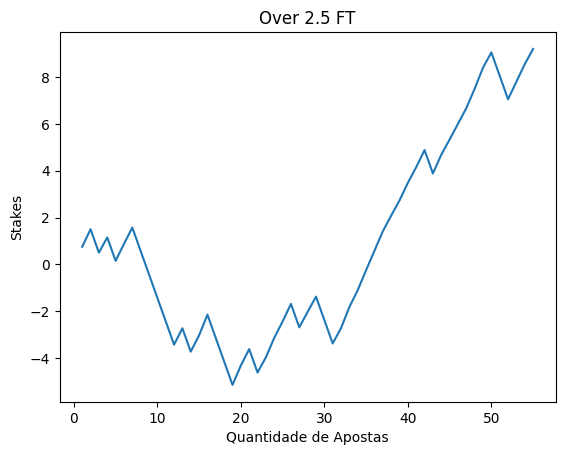

In [13]:
Stake = 1
green = Stake * (df2.Odds_Over25_FT - 1) 
red = -Stake

# Over 2.5 FT
df2.loc[((df2['Total_Goals_FT']) > 2), 'Profit_Over25'] = green
df2.loc[((df2['Total_Goals_FT']) <= 2), 'Profit_Over25'] = red
df2['Profit_acu_Over25'] = df2.Profit_Over25.cumsum()
df2.Profit_acu_Over25.plot(title='Over 2.5 FT', xlabel='Quantidade de Apostas', ylabel='Stakes')
#df2.to_excel('teste25ft.xlsx', index=None)

In [14]:
df2['Profit_acu_Over25'].tail(1)

Nº
55    9.2
Name: Profit_acu_Over25, dtype: float64

Unindo a base para pegar os jogos do dia


In [15]:
df2['League'].unique()

array(['Holanda'], dtype=object)

In [16]:
df1.replace(np.inf, 1, inplace=True)
base_H = df1[['Home', 'Media_Gols_Feitos_Home', 'Media_Gols_Sofridos_Home', 'Media_Gols_Feitos_Away', 'Media_Gols_Sofridos_Away']]

base_A = df1[['Away', 'Media_Gols_Feitos_Home', 'Media_Gols_Sofridos_Home', 'Media_Gols_Feitos_Away', 'Media_Gols_Sofridos_Away']]

from datetime import date, datetime, timedelta
dia = date.today() - timedelta(-1)

base_H

,Home,Media_Gols_Feitos_Home,Media_Gols_Sofridos_Home,Media_Gols_Feitos_Away,Media_Gols_Sofridos_Away
Nº,,,,,
4,For Sittard,2.6,0.8,2.4,1.0
5,Ajax,2.0,1.0,0.6,1.2
6,Cambuur,2.4,1.0,0.6,2.0
7,Utrecht,3.2,1.0,2.2,1.2
8,Zwolle,1.6,0.4,1.8,1.8
...,...,...,...,...,...
608,Groningen,1.2,1.6,2.2,1.2
609,Heerenveen,1.4,2.4,0.8,2.4
610,Twente,3.2,1.4,1.8,1.6


In [17]:
jogos_do_dia = pd.read_excel('G:\\Meu Drive\\Programacao\\futPythonTrader\\Jogos do dia\\'+str(dia)+'_Jogos_do_Dia_FlashScore.xlsx')
#jogos_do_dia = pd.read_excel('E:\\Python\\Bet\\futPythonTrader\\Jogos do dia\\2023-04-01_Jogos_do_Dia_FlashScore.xlsx')

#jogos_do_dia = jogos_do_dia[['League','Round','Date','Time','Home','Away','FT_Odd_H','FT_Odd_D','FT_Odd_A','FT_Odd_Over25','FT_Odd_Under25','FT_Odd_BTTS_Yes','FT_Odd_BTTS_No']] 
jogos_do_dia = jogos_do_dia[['League','Date','Time','Home','Away','FT_Odd_H','FT_Odd_D','FT_Odd_A','FT_Odd_Over25','FT_Odd_Under25','FT_Odd_BTTS_Yes','FT_Odd_BTTS_No']] 
jogos_do_dia.dropna(inplace=True)
jogos_do_dia.reset_index(inplace=True, drop=True)
jogos_do_dia.index = jogos_do_dia.index.set_names(['Nº'])
Jogos_do_Dia = jogos_do_dia.rename(index=lambda x: x + 1)
Jogos_do_Dia

,League,Date,Time,Home,Away,FT_Odd_H,FT_Odd_D,FT_Odd_A,FT_Odd_Over25,FT_Odd_Under25,FT_Odd_BTTS_Yes,FT_Odd_BTTS_No
Nº,,,,,,,,,,,,
1,SERIE A - ROUND 38,04.06.2023,13:30,Napoli,Sampdoria,1.18,7.30,14.50,1.35,3.25,1.88,1.90
2,SERIE A - ROUND 38,04.06.2023,16:00,AC Milan,Verona,1.78,3.70,4.45,1.92,1.88,1.83,1.95
3,SERIE A - ROUND 38,04.06.2023,16:00,AS Roma,Spezia,1.98,3.65,3.65,1.96,1.85,1.80,1.98
4,SERIE A - ROUND 38,04.06.2023,16:00,Atalanta,Monza,1.60,4.45,4.95,1.53,2.50,1.60,2.35
5,SERIE A - ROUND 38,04.06.2023,16:00,Lecce,Bologna,2.75,3.35,2.55,1.96,1.85,1.72,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...
301,FRIENDLY INTERNATIONAL,04.06.2023,00:00,Nigeria U16,USA U16,1.25,5.00,8.50,1.57,2.38,1.83,1.83
302,PREMIER SOCCER LEAGUE - ROUND 12,04.06.2023,10:00,Dynamos,ZPC Kariba,1.25,5.00,8.50,1.57,2.38,1.83,1.83
303,PREMIER SOCCER LEAGUE - ROUND 12,04.06.2023,10:00,GreenFuel,Platinum,1.25,5.00,8.50,1.57,2.38,1.83,1.83


In [18]:
lista=[]

for a,b,c,d,e,f,g,h,i,j,k,l in zip(Jogos_do_Dia.League,Jogos_do_Dia.Date,Jogos_do_Dia.Time,Jogos_do_Dia.Home,Jogos_do_Dia.Away,
                                   Jogos_do_Dia.FT_Odd_H,Jogos_do_Dia.FT_Odd_D,Jogos_do_Dia.FT_Odd_A,Jogos_do_Dia.FT_Odd_Over25,Jogos_do_Dia.FT_Odd_Under25,
                                   Jogos_do_Dia.FT_Odd_BTTS_Yes,Jogos_do_Dia.FT_Odd_BTTS_No):
        League = a
        Date = b
        Time = c
        home = d
        away = e
        FT_Odd_H = f
        FT_Odd_D = g
        FT_Odd_A = h
        FT_Odd_Over25 = i
        FT_Odd_Under25 = j
        FT_Odd_BTTS_Yes = k
        FT_Odd_BTTS_No = l

        dfh = base_H[base_H.Home == home].tail(1)
        
        dfa = base_A[base_A.Away == away].tail(1)

        jogo = {}

        jogo["League"] = League 
        jogo["Date"] = Date
        jogo["Time"] = Time
        jogo["Home"] = home
        jogo["Away"] = away
        jogo["FT_Odd_H"] = FT_Odd_H
        jogo["FT_Odd_D"] = FT_Odd_D
        jogo["FT_Odd_A"] = FT_Odd_A
        jogo["FT_Odd_Over25"] = FT_Odd_Over25
        jogo["FT_Odd_Under25"] = FT_Odd_Under25
        jogo["FT_Odd_BTTS_Yes"] = FT_Odd_BTTS_Yes
        jogo["FT_Odd_BTTS_No"] = FT_Odd_BTTS_No

        try:
            # jogo['Media_Gols_Feitos_Home_FT'] = 0
            # jogo['Media_Gols_Sofridos_Home_FT'] = 0
            # jogo['CV_Gols_Feitos_Home_FT'] = 0
            # jogo['Media_Gols_Feitos_Away_FT'] = 0
            # jogo['Media_Gols_Sofridos_Away_FT'] = 0

            jogo['Media_Gols_Feitos_Home_FT'] = dfh[dfh.Home == home]['Media_Gols_Feitos_Home'].iloc[0]
            jogo['Media_Gols_Sofridos_Home_FT'] = dfh[dfh.Home == home]['Media_Gols_Sofridos_Home'].iloc[0]
            jogo['Media_Gols_Feitos_Away_FT'] = dfh[dfh.Home == home]['Media_Gols_Feitos_Away'].iloc[0]
            jogo['Media_Gols_Sofridos_Away_FT'] = dfh[dfh.Home == home]['Media_Gols_Sofridos_Away'].iloc[0]

            jogo['Media_Gols_Feitos_Home_FT'] = dfa[dfa.Away == away]['Media_Gols_Feitos_Home'].iloc[0]
            jogo['Media_Gols_Sofridos_Home_FT'] = dfa[dfa.Away == away]['Media_Gols_Sofridos_Home'].iloc[0]
            jogo['Media_Gols_Feitos_Away_FT'] = dfa[dfa.Away == away]['Media_Gols_Feitos_Away'].iloc[0]
            jogo['Media_Gols_Sofridos_Away_FT'] = dfa[dfa.Away == away]['Media_Gols_Sofridos_Away'].iloc[0]


            #jogo['Media_Gols_Feitos_Home_HT'] = df2[df2.Away == away]['Media_Gols_Feitos_Home_HT'].iloc[0]
            #jogo['Media_Gols_Sofridos_Home_FT'] = df2[df2.Away == away]['Media_Gols_Sofridos_Home_FT'].iloc[0]
                        
        except:
            pass
        
        lista.append(jogo)


df = pd.DataFrame(lista)
#df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)
df.to_excel(f'teste_entrada_FTOver25_.xlsx', index=None)
df




,League,Date,Time,Home,Away,FT_Odd_H,FT_Odd_D,FT_Odd_A,FT_Odd_Over25,FT_Odd_Under25,FT_Odd_BTTS_Yes,FT_Odd_BTTS_No,Media_Gols_Feitos_Home_FT,Media_Gols_Sofridos_Home_FT,Media_Gols_Feitos_Away_FT,Media_Gols_Sofridos_Away_FT
Nº,,,,,,,,,,,,,,,,
1,SERIE A - ROUND 38,04.06.2023,13:30,Napoli,Sampdoria,1.18,7.30,14.50,1.35,3.25,1.88,1.90,NaN,NaN,NaN,NaN
2,SERIE A - ROUND 38,04.06.2023,16:00,AC Milan,Verona,1.78,3.70,4.45,1.92,1.88,1.83,1.95,NaN,NaN,NaN,NaN
3,SERIE A - ROUND 38,04.06.2023,16:00,AS Roma,Spezia,1.98,3.65,3.65,1.96,1.85,1.80,1.98,NaN,NaN,NaN,NaN
4,SERIE A - ROUND 38,04.06.2023,16:00,Atalanta,Monza,1.60,4.45,4.95,1.53,2.50,1.60,2.35,NaN,NaN,NaN,NaN
5,SERIE A - ROUND 38,04.06.2023,16:00,Lecce,Bologna,2.75,3.35,2.55,1.96,1.85,1.72,2.10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,FRIENDLY INTERNATIONAL,04.06.2023,00:00,Nigeria U16,USA U16,1.25,5.00,8.50,1.57,2.38,1.83,1.83,NaN,NaN,NaN,NaN
302,PREMIER SOCCER LEAGUE - ROUND 12,04.06.2023,10:00,Dynamos,ZPC Kariba,1.25,5.00,8.50,1.57,2.38,1.83,1.83,NaN,NaN,NaN,NaN
303,PREMIER SOCCER LEAGUE - ROUND 12,04.06.2023,10:00,GreenFuel,Platinum,1.25,5.00,8.50,1.57,2.38,1.83,1.83,NaN,NaN,NaN,NaN


In [19]:
# Selecionando o Filtro Estatítisco
flt2 = ((df.FT_Odd_Over25 >= 1.63) &
        (df.FT_Odd_Over25 <= 1.91) &
        (df.Media_Gols_Feitos_Home_FT >= 1.51) &
        (df.Media_Gols_Feitos_Home_FT < 3) &
        (df.Media_Gols_Sofridos_Home_FT >= 0.51) &
        (df.Media_Gols_Feitos_Away_FT >= 0.51) &
        (df.Media_Gols_Sofridos_Away_FT < 3))


Over25FT = df[flt2]

Over25FT = Over25FT[['Date','Time','League','Home','Away','FT_Odd_H','FT_Odd_D','FT_Odd_A','FT_Odd_Over25']]
Over25FT = drop_reset_index(Over25FT)


from datetime import date, datetime, timedelta
data = datetime.today() + timedelta(1)
amanha = data.strftime('%Y-%m-%d')
Over25FT.to_excel(f'Entradas Over25ft\\{amanha}_entrada_FTOver25_Holanda.xlsx', index=None)
Over25FT


,Date,Time,League,Home,Away,FT_Odd_H,FT_Odd_D,FT_Odd_A,FT_Odd_Over25
1,04.06.2023,13:00,EREDIVISIE - CONFERENCE LEAGUE - PLAY OFFS - S...,Sparta Rotterdam,Utrecht,2.42,3.55,2.8,1.72
